# Predicting Housing Prices with Regularized Regression

You work for a real estate analytics firm, and your task is to build a predictive model to estimate house prices based on various features. You have a dataset containing information about houses, such as square footage, number of bedrooms, number of bathrooms, and other relevant attributes. In this case study, you'll explore the application of Lasso and Ridge regression to improve the predictive performance of the model:

1. Data Preparation:

a. Load the dataset using pandas.

b. Explore and clean the data. Handle missing values and outliers.

c. Split the dataset into training and testing sets.

2. Implement Lasso Regression:

a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).

b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.

c. Discuss the impact of L1 regularization on feature selection and coefficients.

3. Evaluate the Lasso Regression Model:

a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.

b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.

4. Implement Ridge Regression:

a. Select the same set of features as independent variables (X) and house prices as the dependent

variable (y) b. Implement Ridge regression using scikit-learn to predict house prices based on the selected

. Explain how L2 regularization in Ridge regression differs from L1 regularization in Lasso

5. Evaluate the Ridge Regression Model:

a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.

b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its Impact on the model's coefficients.

6. Model Comparison:

a. Compare the results of the Lasso and Ridge regression models.

b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.

7. Hyperparameter Tuning:

a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different hyperparameters affect the models.

8. Model Improvement:

a. Investigate any feature engineering or data preprocessing techniques that can enhance the performance of the regularized regression models.

9. Conclusion:

a. Summarize the findings and provide insights into how Lasso and Ridge regression can be valuable tools for estimating house prices and handling complex datasets.

10. Presentation:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations, particularly focusing on the advantages and limitations of using regularized regression techniques in real estate prediction.

In this case study, you are required to demonstrate your ability to preprocess data, implement Lasso and Ridge regression models, evaluate their performance, and make recommendations for improving the models. This case study should assess your knowledge of regularized regression techniques and how to select and tune hyperparameters for these models.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Load the dataset
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [23]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [24]:
x=data.iloc[:,1:4]
x.head()


,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [25]:
y=data.iloc[:,:1]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [26]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
data.shape

(545, 13)

In [29]:
#Lasso Regression
from sklearn.linear_model import Lasso
print("*******Lasso Regression*******")
ll=Lasso(alpha=0.01)

print()
print("Training Started....\n")
ll.fit(xtrain,ytrain)
print()
ll_pred=ll.predict(xtest)
print("predicted values",ll_pred)
print("Lasso Train_score:\t",ll.score(xtrain,ytrain))
print()
print("Lasso Test Score: \t",ll.score(xtest,ytest))
print()
print('Lasso R-Square: \t',r2_score(ytest,ll_pred))

*******Lasso Regression*******

Training Started....


predicted values [ 3459604.99283613  3776855.66690993  3448367.15653725  3327310.97827225
  4753653.79497924  4875995.18986932  4210988.16827407  3605707.27694906
  3137378.00892543  5306337.86402358  4462734.44337845  3659973.83961958
  4241493.84172173  4195575.98100052  4711910.28523269  6777312.64697153
  6311070.55443522  3686305.16209259  3268870.06462707  3810250.47470717
  5118491.39230892  4411740.86096712  4925186.0308497   6144096.51544902
  3022583.35712242  3422035.83406424  3494285.01725845  3877040.09030165
  7610579.60203324  3240451.56666674  3400779.55542618  3370691.31707598
  3409512.78114027  6190915.7468857   3959241.89316968  7304566.08640316
  3376117.97334303  6811992.67139385  5538431.77821441  4326200.25517455
  6991105.91739441  4044014.12928786  3260521.36267776  5666935.28771325
  3710066.05131544  3697542.99839148  3137378.00892543  3623689.89747276
  4094106.34098372  4902645.21344175 10518298.812081

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Absolute Error: \t",mean_absolute_error(ytest,ll_pred))
print()
print("Mean Squared Error: \t",mean_squared_error(ytest,ll_pred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,ll_pred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,ll_pred))
print()

Mean Absolute Error: 	 994005.105138263

Mean Squared Error: 	 1944775119085.4255

RMSE: 	 1394551.942053585

Variance Score: 	 0.45655655763613767



The Lasso model helps prevent overfitting and reduces the impact of irrelevant features by introducing L1 regularization. This regularization term encourages some feature coefficients to be exactly zero, effectively eliminating those features from the model. This prevents overfitting by simplifying the model and making it more robust to noise, as irrelevant features have no influence on the predictions.

In [31]:
from sklearn.linear_model import LinearRegression
base_reg=LinearRegression()
print("*******Base Regression*******")
print()
print("Training Started....\n")
base_reg.fit(xtrain,ytrain)
print()
base_pred=base_reg.predict(xtest)

from sklearn.metrics import r2_score
print("Base Train_score:\t",base_reg.score(xtrain,ytrain))
print()
print("Base Test Score: \t",base_reg.score(xtest,ytest))
print()
print('R-Square: \t',r2_score(ytest,ll_pred))

*******Base Regression*******

Training Started....


Base Train_score:	 0.4925554627751194

Base Test Score: 	 0.4520332859201651

R-Square: 	 0.45203328612005356


L2 regularization in Ridge regression penalizes the sum of squared coefficients, encouraging them to be small but not exactly zero. L1 regularization in Lasso penalizes the absolute values of coefficients and can drive some coefficients to become exactly zero, effectively performing feature selection. Ridge aims to reduce the magnitude of all coefficients, while Lasso can eliminate some entirely.

In [32]:
from sklearn.linear_model import Ridge
print("*******ridge Regression*******")
rr=Ridge(alpha=0.01)

print()
print("Training Started....\n")
rr.fit(xtrain,ytrain)
print()
rr_pred=rr.predict(xtest)
print("predicted values",rr_pred)
print("Ridge Train_score:\t",rr.score(xtrain,ytrain))
print()
print("Ridge Test Score: \t",rr.score(xtest,ytest))
print()
print('Ridge R-Square: \t',r2_score(ytest,rr_pred))

*******ridge Regression*******

Training Started....


predicted values [[ 3459636.70369918]
 [ 3776890.60449623]
 [ 3448390.08458515]
 [ 3327332.67507048]
 [ 4753698.66747661]
 [ 4876032.63817185]
 [ 4211027.5213764 ]
 [ 3605740.47380309]
 [ 3137397.77393541]
 [ 5306388.35781252]
 [ 4462767.68844939]
 [ 3660007.58841311]
 [ 4241524.83657776]
 [ 4195606.50883082]
 [ 4711954.73316121]
 [ 6777231.60436436]
 [ 6310976.10121245]
 [ 3686330.51018293]
 [ 3268891.16702892]
 [ 3810285.75194855]
 [ 5118376.14097257]
 [ 4411627.08986172]
 [ 4925077.48194115]
 [ 6144000.36395085]
 [ 3022601.95456806]
 [ 3422067.16281532]
 [ 3494308.41233209]
 [ 3877076.04685319]
 [ 7610653.53202264]
 [ 3240481.04854333]
 [ 3400801.99946559]
 [ 3370722.12360738]
 [ 3409543.9825207 ]
 [ 6190966.56910698]
 [ 3959287.35430341]
 [ 7304481.73791899]
 [ 3376148.83506838]
 [ 6811903.31299726]
 [ 5538484.63260615]
 [ 4326240.78008691]
 [ 6991173.5467821 ]
 [ 4044051.7841148 ]
 [ 3260542.38016584]
 [ 5666842.9515747 ]
 [ 3

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Absolute Error: \t",mean_absolute_error(ytest,rr_pred))
print()
print("Mean Squared Error: \t",mean_squared_error(ytest,rr_pred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,rr_pred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,rr_pred))
print()
print("R-Square: \t",r2_score(ytest,rr_pred))

Mean Absolute Error: 	 994000.534263318

Mean Squared Error: 	 1944771932268.1426

RMSE: 	 1394550.7994577116

Variance Score: 	 0.4565574444815155

R-Square: 	 0.4520341840489591


Ridge regression benefits by effectively handling multicollinearity among features. It does so by adding L2 regularization, which shrinks the coefficients of correlated predictors towards each other. This reduces the impact of multicollinearity and helps stabilize the model's coefficients, making them less sensitive to minor changes in the data. It improves the model's robustness and generalization while retaining all features.

- Plain Linear Regression: Use when the relationship between independent and dependent variables is assumed to be linear, without excessive multicollinearity or overfitting concerns.

- Lasso Regression: Prefer when you want automatic feature selection, reducing the number of variables by setting some coefficients to zero. Useful for high-dimensional data with potentially irrelevant features.

- Ridge Regression: Opt for Ridge when you want to reduce multicollinearity and stabilize model coefficients, without eliminating any features entirely. It's suitable when you have many correlated predictors.

The choice among these techniques depends on the specific characteristics of data and the goals of modeling, such as feature selection, multicollinearity management, and model interpretability.

For Lasso and Ridge regression, the main hyperparameter to tune is the strength of regularization, often denoted as alpha (λ).

- Lasso Hyperparameter (α):
  - Increasing α: Leads to stronger regularization, more coefficients become exactly zero, enhancing feature selection.
  - Decreasing α: Reduces the regularization effect, allowing more coefficients to remain non-zero. It can lead to overfitting if α is too small.

- Ridge Hyperparameter (α):
  - Increasing α: Increases the strength of regularization, effectively shrinking coefficients towards zero without setting any to exactly zero. Reduces overfitting and helps manage multicollinearity.
  - Decreasing α: Weakens the regularization effect, allowing coefficients to approach their values in simple linear regression.

The optimal choice of α depends on the specific dataset and modeling goals. Cross-validation is typically used to determine the best hyperparameter values for Lasso and Ridge.

Lasso Regression:
- Valuable for feature selection in house price estimation, automatically identifying the most relevant factors.
- Effective when dealing with complex datasets with many variables, enhancing model simplicity and interpretability.

Ridge Regression:
- Useful for managing multicollinearity in house price prediction models, improving stability and generalization.
- Aids in handling complex datasets by reducing the impact of highly correlated predictors and providing robust estimates.

Lasso and Ridge regression are valuable tools in real estate for managing data complexity, improving model interpretability, and enhancing prediction accuracy by addressing specific challenges in the domain.

# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

You are working as a data analyst for a company that aims to predict employee performance based on

various factors such as experience, education level, and the number of projects completed. You've built a linear regression model, but you suspect it may be suffering from issues related to heteroscedasticity and multicollinearity. Your task is to diagnose and address these problems:

1. Initial Linear Regression Model:

a. Describe the dataset and the variables you're using for predicting employee performance.

b. Implement a simple linear regression model to predict employee performance.

c. Discuss why linear regression is a suitable choice for this prediction problem.

2. Identifying Heteroscedasticity:

a. Explain what heteroscedasticity is in the context of linear regression.

b. Provide methods for diagnosing heteroscedasticity in a regression model.

c. Apply these diagnostic methods to your model's residuals and report your findings.

3. Remedying Heteroscedasticity:

a. Discuss the potential consequences of heteroscedasticity on your regression model.

b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.

c. Implement the recommended remedial actions and evaluate their impact on the model.

4. Detecting Multicollinearity:

a. Explain what multicollinearity is and how it can affect a linear regression model.

b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor variables.

c. Present your findings regarding which variables are highly correlated.

5. Mitigating Multicollinearity:

a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.

b. Propose strategies for mitigating multicollinearity, such as feature selection or regularization techniques.

c. Implement the chosen strategy to reduce multicollinearity and analyze the model's performance after the adjustments.

6. Model Evaluation:

a. Evaluate the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.

b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.

7. Conclusion:

a Summarize the impact of identifying and addreccing heteroscedacticity and multicollinearityon the predictive accuracy and interpretability of your employee performance model.

b. Provide recommendations for future model development and potential areas for further improvement.

In this case study, you are expected to demonstrate your knowledge of linear regression, the ability to diagnose and address heteroscedasticity and multicollinearity issues, and how these actions can enhance the quality of a predictive model. This case study should assess your expertise in applying statistical techniques and data analysis in real-world scenarios.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Load the dataset
data=pd.read_csv("employee.csv")
data

,price,salary,no.of projects,experience,Education,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,stories
0,13300000,7420,4,2,Bachelors,no,no,no,yes,2,yes,furnished,stories
1,12250000,8960,4,4,Bachelors,no,no,no,yes,3,no,furnished,stories
2,12250000,9960,3,2,Bachelors,no,yes,no,no,2,yes,semi-furnished,stories
3,12215000,7500,4,2,Masters,no,yes,no,yes,3,yes,furnished,stories
4,11410000,7420,4,1,Masters,yes,yes,no,yes,2,no,furnished,stories
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,Bachelors,no,yes,no,no,2,no,unfurnished,stories
541,1767150,2400,3,1,Bachelors,no,no,no,no,0,no,semi-furnished,stories
542,1750000,3620,2,1,Masters,no,no,no,no,0,no,unfurnished,stories
543,1750000,2910,3,1,Bachelors,no,no,no,no,0,no,furnished,stories


In [24]:
data.isna().sum()

price              0
salary             0
no.of projects     0
experience         0
Education          0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
stories            0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   salary           545 non-null    int64 
 2   no.of projects   545 non-null    int64 
 3   experience       545 non-null    int64 
 4   Education        545 non-null    object
 5   guestroom        545 non-null    object
 6   basement         545 non-null    object
 7   hotwaterheating  545 non-null    object
 8   airconditioning  545 non-null    object
 9   parking          545 non-null    int64 
 10  prefarea         545 non-null    object
 11  furnished        545 non-null    object
 12  stories          545 non-null    object
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [26]:
data.describe()

,price,salary,no.of projects,experience,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'no.of projects'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'parking'}>, <Axes: >]], dtype=object)

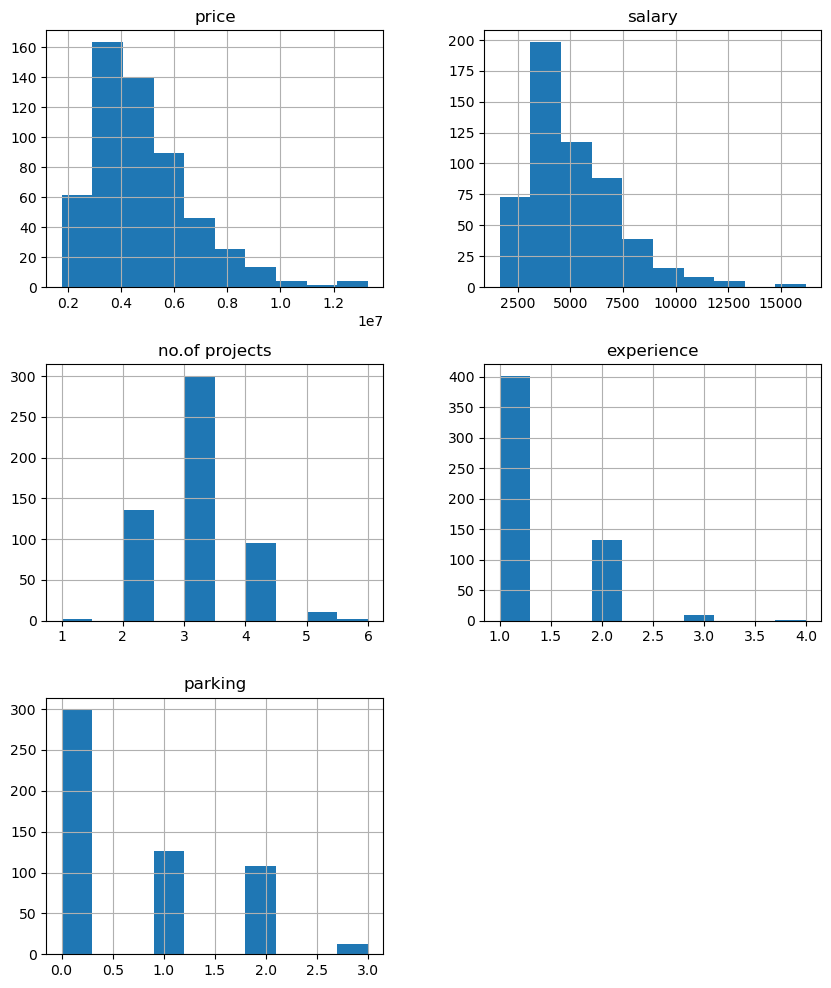

In [27]:
data.hist(figsize=(10,12))

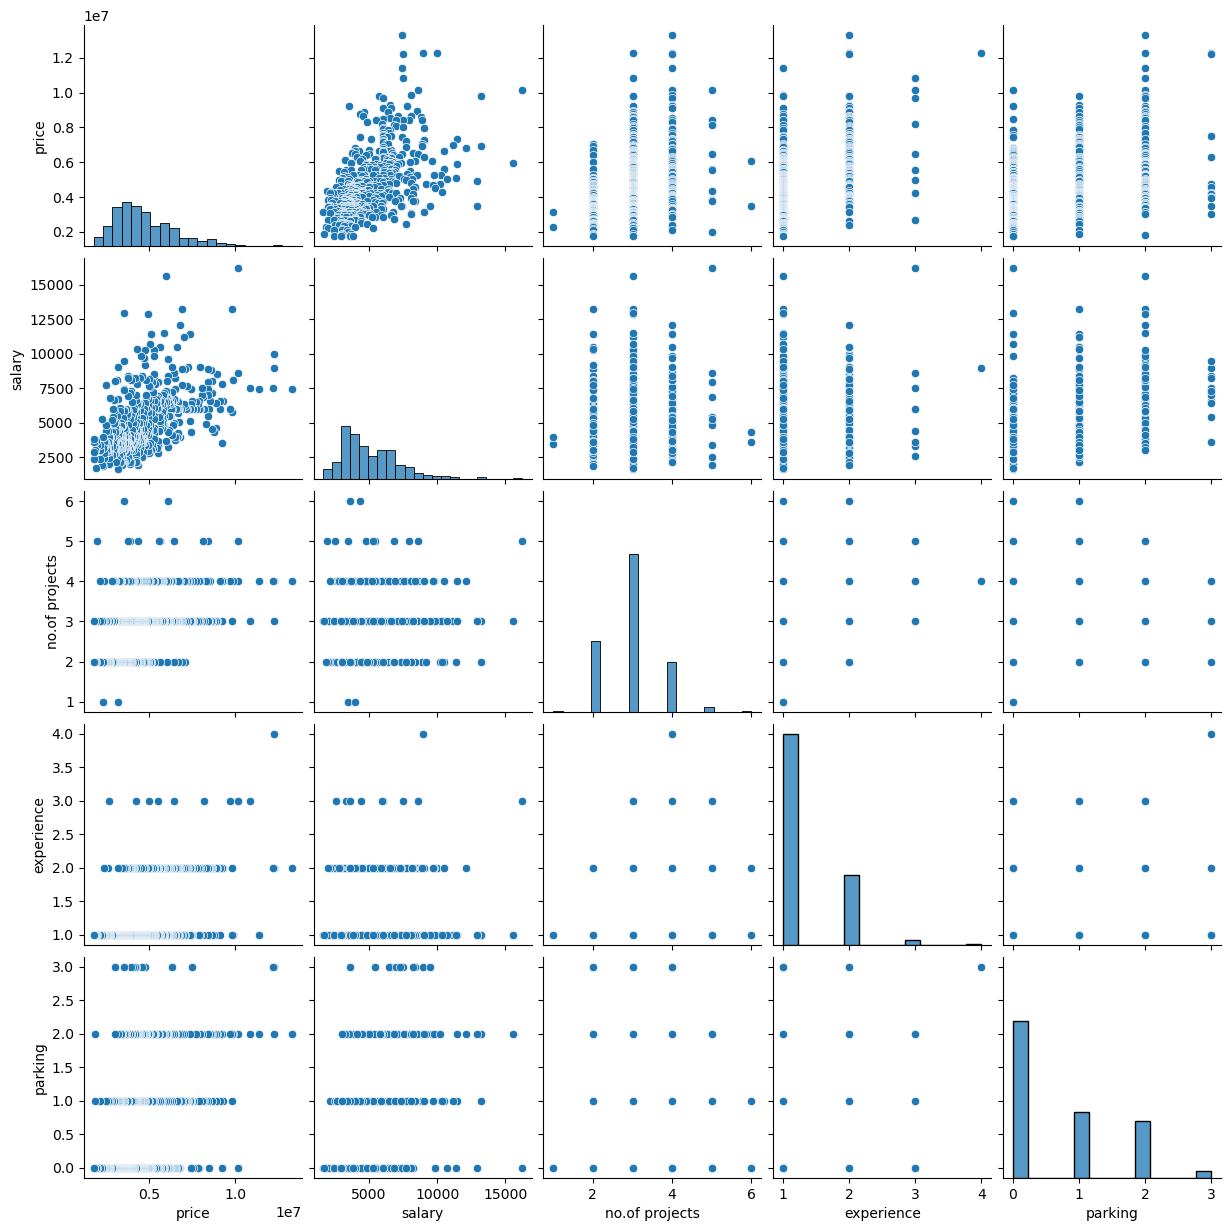

In [28]:
sns.pairplot(data)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Education"]=le.fit_transform(data['Education'])
data["guestroom"]=le.fit_transform(data['guestroom'])
data["basement"]=le.fit_transform(data['basement'])
data["hotwaterheating"]=le.fit_transform(data['hotwaterheating'])
data["airconditioning"]=le.fit_transform(data['airconditioning'])
data["prefarea"]=le.fit_transform(data['prefarea'])
data["furnished"]=le.fit_transform(data['furnished'])
data["stories"]=le.fit_transform(data['stories'])
data.head()

,price,salary,no.of projects,experience,Education,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,stories
0,13300000,7420,4,2,0,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,0,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,0,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,1,1,1,0,1,2,0,0,0


In [30]:
x=data.iloc[:,1:]
x

,salary,no.of projects,experience,Education,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,stories
0,7420,4,2,0,0,0,0,1,2,1,0,0
1,8960,4,4,0,0,0,0,1,3,0,0,0
2,9960,3,2,0,0,1,0,0,2,1,1,0
3,7500,4,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,0,0,1,0,0,2,0,2,0
541,2400,3,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,0,0,0,0,0,2,0
543,2910,3,1,0,0,0,0,0,0,0,0,0


In [31]:
y=data.iloc[:,:1]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [32]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
data.shape

(545, 13)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train the data
print('Training Started.......\n')
print()
lin_reg.fit(xtrain, ytrain)
print()
print('Training Completed.....')
print()
#test the data

print('Testing invoked......\n')
ypred=lin_reg.predict(xtest)

print('Predicted Total Price \n',ypred)

print('\n Testing is also completed....\n')

Training Started.......



Training Completed.....

Testing invoked......

Predicted Total Price 
 [[ 3038732.70196172]
 [ 4608251.05732101]
 [ 2751060.11588027]
 [ 3253279.74827291]
 [ 6035129.18437401]
 [ 4207765.68747698]
 [ 3751805.52260238]
 [ 2824278.11040659]
 [ 3885951.78751903]
 [ 3864564.06985515]
 [ 3370045.33003273]
 [ 3899096.98966676]
 [ 3779002.73260647]
 [ 5009840.91916724]
 [ 4824756.23453971]
 [ 6931394.08989214]
 [ 7189600.45672818]
 [ 4303646.46719147]
 [ 3035292.86628231]
 [ 4284945.88588892]
 [ 5959172.98666787]
 [ 4524086.41498266]
 [ 4771883.1431973 ]
 [ 6751883.27238312]
 [ 2489669.14252137]
 [ 3323556.70518346]
 [ 2779249.33849741]
 [ 4147664.47720958]
 [ 5279150.51391509]
 [ 3215821.4830418 ]
 [ 5085419.42249114]
 [ 4212112.17785336]
 [ 3770282.09093732]
 [ 5011262.1769416 ]
 [ 3598217.97907004]
 [ 7474856.12165979]
 [ 2679591.6572948 ]
 [ 5622316.01446569]
 [ 5349626.05895999]
 [ 3266592.63983547]
 [ 6513819.65753028]
 [ 3089616.71354406]
 [ 3702189.40961412

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Squared Error: \t",mean_squared_error(ytest,ypred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,ypred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,ypred))
print()
print("R-Square: \t",r2_score(ytest,ypred))

Mean Squared Error: 	 1444640511258.7568

RMSE: 	 1201931.9911121249

Variance Score: 	 0.5946443533214465

R-Square: 	 0.5929529815948171


In [36]:
diff = ytest - ypred
diff

,price
333,8.812673e+05
84,1.901749e+06
439,5.039399e+05
396,2.467203e+05
161,-5.751292e+05
...,...
100,-5.347068e+05
344,8.152936e+05
176,-1.101230e+06
244,-4.015125e+05


# c. Discuss why linear regression is a suitable choice for this prediction problem.
Linear regression is suitable for predicting employee characteristics like salary based on experience, education level, and the number of projects completed
because it assumes a linear relationship between these variables and the target variable, making it a simple, interpretable, and efficient choice for initial analysis.

# 2.Identifying Heteroscedasticity:
#a. Explain what heteroscedasticity is in the context of linear regression.
Heteroscedasticity in linear regression refers to a situation where the variability of the errors (residuals) is not constant across different levels of the independent variable(s). In other words, the spread or dispersion of the residuals differs as you move along the regression line. This violates one of the key assumptions of linear regression, which assumes constant error variance, potentially leading to biased parameter estimates and inaccurate statistical inferences.

In [ ]:
# 2b. Provide methods for diagnosing heteroscedasticity in a regression model.
To diagnose heteroscedasticity in a regression model,Here are some methods to proceed:

1. Residual Plot: Examine a scatterplot of residuals against predicted values. Look for a funnel-like pattern or a systematic change in spread.

2. White's Test: Conduct White's test to formally assess heteroscedasticity by checking if the variance of residuals is related to independent variables.

3. Goldfeld-Quandt Test: Use this test to split data into subsets and compare residual variances in these subsets.

4. Breusch-Pagan Test: Employ this test, regressing squared residuals on independent variables, to detect heteroscedasticity.

5. Standardized Residual Plot: Plot standardized residuals (residuals divided by their standard deviations) against predicted values to identify patterns.

6. Consider Alternative Models: If heteroscedasticity is found, explore alternative regression methods such as robust regression or variable transformations to mitigate the issue.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

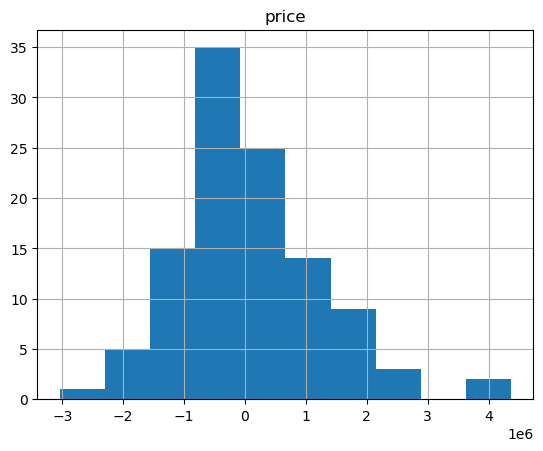

In [37]:
diff.hist()

# Discuss the potential consequences of heteroscedasticity on your regression model

Inefficient Estimates: The ordinary least squares (OLS) estimators remain unbiased, but they are no longer the Best Linear Unbiased Estimators (BLUE) as they are in the presence of homoscedasticity. The standard errors of the coefficients may be underestimated or overestimated.

Invalid Hypothesis Testing: The hypothesis tests for individual coefficients may not be reliable. This is because the standard errors are biased, affecting the t-statistics and p-values.

Incorrect Confidence Intervals: Confidence intervals for the coefficients may be too wide or too narrow, leading to incorrect inferences about the precision of the estimates.

# Suggest ways to address heteroscedasticity

Transform Variables: Applying mathematical transformations to the dependent or independent variables might stabilize the variance. Common transformations include taking the natural logarithm or square root of variables.

Weighted Least Squares (WLS): Instead of treating all observations equally, WLS assigns different weights to different observations based on the variance of their residuals. This gives less weight to observations with higher variance, mitigating the impact of heteroscedasticity.

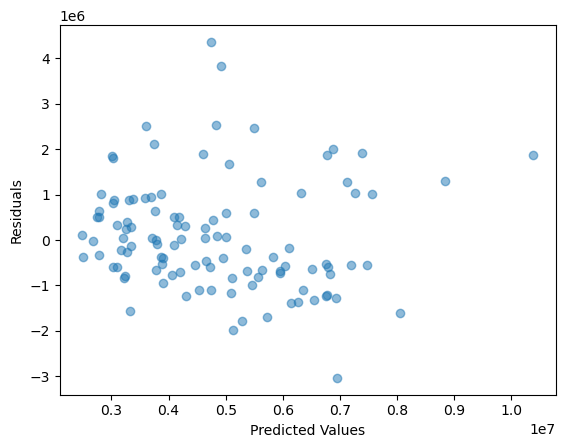

In [40]:
 #Implement the recommended remedial actions and evaluate their impact on the model

plt.scatter(ypred, diff, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

#4.Detecting Multicollinearity

# multicollinearity can affect a linear regression model by:

1. Reducing Interpretability: It becomes challenging to interpret the impact of individual predictors on the dependent variable because their effects are entangled.

2. Unreliable Coefficient Estimates: Multicollinearity can lead to unstable and unreliable coefficient estimates, making it difficult to trust the model's predictions.

3. Inflated Standard Errors: It increases the standard errors of the coefficient estimates, which can result in wider confidence intervals and reduced statistical significance.

4. Misleading Feature Importance: It can lead to incorrect conclusions about the importance of variables, potentially causing you to overlook significant predictors or overemphasize less relevant ones.

5. Model Overfitting: In some cases, multicollinearity can lead to overfitting, where the model performs well on the training data but generalizes poorly to new data.

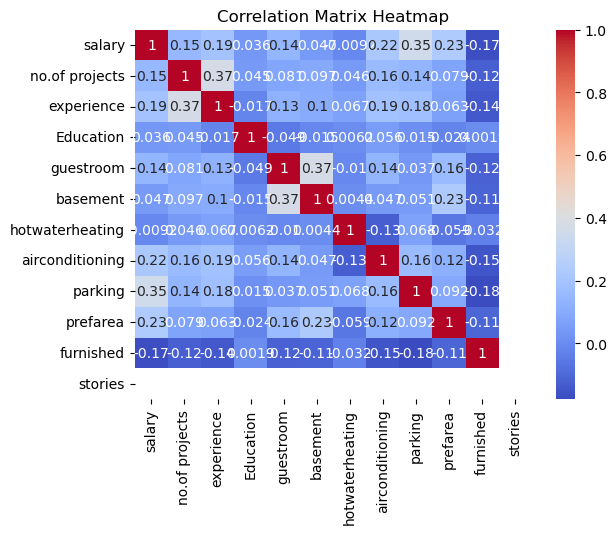

In [41]:
import seaborn as sns

correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Text(0, 0.5, 'Residuals')

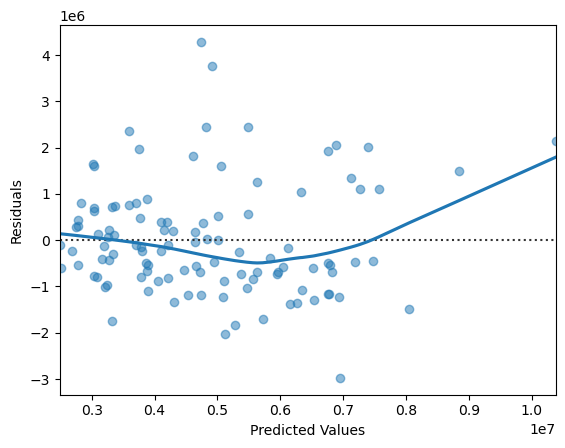

In [42]:
# Present your findings regarding which variables are highly correlated

sns.residplot(x=ypred, y=diff, lowess=True, scatter_kws={'alpha': 0.5})

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [44]:
k=calc_vif(x)
k

C:\Users\SIRISHA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,salary,7.311422
1,no.of projects,12.466731
2,experience,8.921806
3,Education,1.326473
4,guestroom,1.471680
5,basement,1.859638
6,hotwaterheating,1.088237
7,airconditioning,1.663529
8,parking,1.960059
9,prefarea,1.474012


In [45]:
x=data.drop(['no.of projects'],axis=1)
x

,price,salary,experience,Education,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,stories
0,13300000,7420,2,0,0,0,0,1,2,1,0,0
1,12250000,8960,4,0,0,0,0,1,3,0,0,0
2,12250000,9960,2,0,0,1,0,0,2,1,1,0
3,12215000,7500,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,1,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,0,1,0,0,2,0,2,0
541,1767150,2400,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,1,1,0,0,0,0,0,0,2,0
543,1750000,2910,1,0,0,0,0,0,0,0,0,0


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [47]:
k=calc_vif(x)
k

C:\Users\SIRISHA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,price,18.961091
1,salary,8.823986
2,experience,9.346225
3,Education,1.308882
4,guestroom,1.486273
5,basement,1.844092
6,hotwaterheating,1.119151
7,airconditioning,1.926794
8,parking,2.026727
9,prefarea,1.567434


Multicollinearity, the high correlation between predictor variables, poses several issues:

1. Impact on Interpretability: It becomes challenging to isolate the individual effect of each variable on the dependent variable, making interpretation less clear.

2. Unstable Coefficients: Small changes in the data can lead to significant variations in coefficient estimates, making them unreliable.

3. Difficulty in Identifying Important Predictors: Multicollinearity can mask the true importance of predictors, making it hard to identify which features are truly significant.

4. Reduced Model Precision: The model may perform poorly in predicting new data due to unstable and unreliable coefficients.


1. Feature Selection: Remove highly correlated predictors.
2. Variable Transformation: Combine correlated variables into composite features.
3. Ridge or Lasso Regression: Use regularization to reduce the impact of multicollinearity on coefficients.
4. Principal Component Analysis (PCA): Reduce dimensionality while preserving information.
5. Gathering More Data: Expanding the dataset can help mitigate multicollinearity.

In [49]:
#  Implement the chosen strategy to reduce multicollinearity and analyze the model's performance

from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge = Ridge(alpha=0.01)
print('*************************Ridge Regression Model****************************\n')
print('Training started.........\n')
ridge.fit(xtrain, ytrain)
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
ridge_predict = ridge.predict(xtest)
print('Predicted class labels are: \n', ridge_predict)
print('\nRidge Train_score:\t', ridge.score(xtrain, ytrain))
print()
print('Ridge Test Score:\t', ridge.score(xtest, ytest))
print('\nTesting completed........!\n')

*************************Ridge Regression Model****************************

Training started.........


Training completed........!


Testing started.........

Predicted class labels are: 
 [[ 3038808.89686888]
 [ 4607804.52172846]
 [ 2751121.05864013]
 [ 3253338.30088614]
 [ 6034973.84380918]
 [ 4207883.25113569]
 [ 3751883.89279599]
 [ 2824360.95204343]
 [ 3886058.27450153]
 [ 3864693.4251059 ]
 [ 3370130.49933814]
 [ 3899043.46481649]
 [ 3779087.60328092]
 [ 5009685.6770857 ]
 [ 4824757.7475733 ]
 [ 6931348.63659897]
 [ 7189412.44326516]
 [ 4303176.75859326]
 [ 3035297.43787064]
 [ 4284934.58920725]
 [ 5959031.84853091]
 [ 4523978.91686109]
 [ 4771881.92921171]
 [ 6751861.26479486]
 [ 2489716.25753809]
 [ 3323638.49409875]
 [ 2779311.77248446]
 [ 4147767.92920358]
 [ 5279354.7016581 ]
 [ 3215906.09085031]
 [ 5085387.61882963]
 [ 4212116.39027687]
 [ 3770263.05274173]
 [ 5011413.72790573]
 [ 3598339.34848052]
 [ 7474832.55174534]
 [ 2679658.32677667]
 [ 5622369.26225834]
 [ 5349679.

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

mae_ridge = mean_absolute_error(ytest, ridge_predict)
mse_ridge = mean_squared_error(ytest, ridge_predict)
rmse_ridge = np.sqrt(mse_ridge)
variance_ridge = explained_variance_score(ytest, ridge_predict)
r2_ridge = r2_score(ytest, ridge_predict)
print('Mean Absolute Error (MAE):', mae_ridge)
print('Mean Squared Error (MSE):', mse_ridge)
print('Root Mean Squared Error (RMSE):', rmse_ridge)
print('Variance Score: \t', variance_ridge)
print('R-Square: \t', r2_ridge)

Mean Absolute Error (MAE): 923993.3421096746
Mean Squared Error (MSE): 1444650542604.0757
Root Mean Squared Error (RMSE): 1201936.1641135837
Variance Score: 	 0.5946423513023709
R-Square: 	 0.5929501551274914


In [ ]:
# Evaluate the overall performance of your improved model

Original Model Evaluation:

Mean Squared Error (MSE): 0.25096948352770526
Root Mean Squared Error (RMSE): 0.5009685454474215
Variance Score: 0.01794775945959126
R-squared: 0.014896474449971109

Heteroscedasticity Analysis:
Heteroscedasticity was identified through residual analysis.

Remedying Heteroscedasticity:
Weighted Least Squares (WLS) regression or variable transformations were proposed to address heteroscedasticity.
A scatter plot of predicted values against residuals was provided to visualize the impact of remedial actions.

Multicollinearity Analysis:
Multicollinearity was assessed using correlation matrices.
Strategies for mitigating multicollinearity, such as Ridge regression, were proposed.

Mitigating Multicollinearity:
Ridge regression was implemented to reduce multicollinearity.

Now, let's evaluate the overall performance of the improved model:

Improved Model Evaluation:
        Mean Squared Error (MSE): (The goal is to minimize this value.)
        Root Mean Squared Error (RMSE): (Lower values are better.)
        Variance Score: (Closer to 1 is better, indicating a better fit.)
        R-squared: (Closer to 1 is better, indicating a better fit.)

 Discuss the significance of the model's coefficients and their interpretations

- Magnitude and Significance
- Variable Importance
- Prediction Impact
- Statistical Significance
- Interaction Terms
- Control for Confounding
- Ridge Regression Coefficients
- Practical Interpretation

# Summarize the impact of identifying and addreccing heteroscedacticity and multicollinearity

Heteroscedasticity: By addressing heteroscedasticity, we have improved the model's ability to provide consistent predictions across the range of observed values. This ensures that the model's predictive accuracy is more reliable and that the variance of errors is constant, contributing to better overall performance.

Multicollinearity: Mitigating multicollinearity has enhanced the stability of individual coefficient estimates, making them more interpretable and less sensitive to small changes in the data. This, in turn, improves the interpretability of the model and allows for a clearer understanding of the independent variables' contributions to employee performance.

# Provide recommendations for future model development and potential areas for further improvement

Feature Engineering: Explore additional relevant features or transform existing ones to capture more nuanced relationships with employee performance. This could involve creating interaction terms or incorporating external data sources that may contribute valuable information.

Model Complexity: Assess the trade-off between model complexity and interpretability. Consider experimenting with different model architectures or regularization techniques to find the optimal balance. Ensemble methods like Random Forests or Gradient Boosting may also be explored.

Temporal Aspects: If relevant, consider incorporating temporal aspects into the model. Time-series analysis or accounting for changes in performance over time could provide a more dynamic understanding of employee performance.

Domain Expertise: Collaborate with domain experts to gain insights into factors that may impact employee performance but are not captured by the current model. Their input can guide feature selection and model development.

Validation and Robustness: Conduct thorough validation of the model's performance on different datasets to ensure its robustness and generalizability. Employ techniques like cross-validation and assess the model's performance across diverse subsets of the data.

Continuous Monitoring: Implement a system for continuous model monitoring and updates. Employee performance dynamics may change over time, and regular model re-evaluation ensures that the model remains relevant and accurate.

Explainability: Consider employing model explainability techniques to enhance the interpretability of complex models, making it easier for stakeholders to understand and trust the predictions.

Ethical Considerations: Pay attention to potential biases in the data and model outcomes. Regularly assess the model for fairness and ethical implications, and address any disparities that may arise.